In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
CreditData= pd.read_csv(r"C:\Users\anshi\OneDrive\Desktop\Python Jupyter\CodSoft Tasks\fraudTest.csv")

In [4]:
CreditData.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
print(CreditData.shape)

(555719, 23)


In [6]:
print(CreditData.describe())

          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1

In [7]:
CreditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
CreditData.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
CreditData['is_fraud'].value_counts() # 0-Legit Transactions and 1-Fraud Transactions.

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [10]:
# Seperating the data for analysis
fraud = CreditData[CreditData['is_fraud'] == 1]
valid = CreditData[CreditData['is_fraud'] == 0]

In [11]:
print(fraud.shape)

(2145, 23)


In [12]:
print(valid.shape)

(553574, 23)


In [13]:
# Statistical measures of the data
valid.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [14]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [15]:
CreditData.pop('gender')

0         M
1         F
2         F
3         M
4         M
         ..
555714    M
555715    M
555716    F
555717    M
555718    M
Name: gender, Length: 555719, dtype: object

In [16]:
CreditData.pop('street')

0                   351 Darlene Green
1                    3638 Marsh Union
2                9333 Valentine Point
3         32941 Krystal Mill Apt. 552
4            5783 Evan Roads Apt. 465
                     ...             
555714            558 Michael Estates
555715            572 Davis Mountains
555716     144 Evans Islands Apt. 683
555717     7020 Doyle Stream Apt. 951
555718       830 Myers Plaza Apt. 384
Name: street, Length: 555719, dtype: object

In [17]:
CreditData.pop('city')

0             Columbia
1              Altonah
2             Bellmore
3           Titusville
4             Falmouth
              ...     
555714           Luray
555715    Lake Jackson
555716         Burbank
555717            Mesa
555718          Edmond
Name: city, Length: 555719, dtype: object

In [18]:
CreditData.pop('job')

0            Mechanical engineer
1         Sales professional, IT
2              Librarian, public
3                   Set designer
4             Furniture designer
                   ...          
555714              Town planner
555715            Futures trader
555716                  Musician
555717              Cartographer
555718               Media buyer
Name: job, Length: 555719, dtype: object

In [19]:
CreditData.pop('trans_date_trans_time')

0         2020-06-21 12:14:25
1         2020-06-21 12:14:33
2         2020-06-21 12:14:53
3         2020-06-21 12:15:15
4         2020-06-21 12:15:17
                 ...         
555714    2020-12-31 23:59:07
555715    2020-12-31 23:59:09
555716    2020-12-31 23:59:15
555717    2020-12-31 23:59:24
555718    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 555719, dtype: object

In [20]:
CreditData.pop('dob')

0         1968-03-19
1         1990-01-17
2         1970-10-21
3         1987-07-25
4         1955-07-06
             ...    
555714    1966-02-13
555715    1999-12-27
555716    1981-11-29
555717    1965-12-15
555718    1993-05-10
Name: dob, Length: 555719, dtype: object

In [21]:
CreditData.pop('trans_num')

0         2da90c7d74bd46a0caf3777415b3ebd3
1         324cc204407e99f51b0d6ca0055005e7
2         c81755dbbbea9d5c77f094348a7579be
3         2159175b9efe66dc301f149d3d5abf8c
4         57ff021bd3f328f8738bb535c302a31b
                        ...               
555714    9b1f753c79894c9f4b71f04581835ada
555715    2090647dac2c89a1d86c514c427f5b91
555716    6c5b7c8add471975aa0fec023b2e8408
555717    14392d723bb7737606b2700ac791b7aa
555718    1765bb45b3aa3224b4cdcb6e7a96cee3
Name: trans_num, Length: 555719, dtype: object

In [22]:
CreditData.pop('state')

0         SC
1         UT
2         NY
3         FL
4         MI
          ..
555714    MO
555715    TX
555716    WA
555717    ID
555718    OK
Name: state, Length: 555719, dtype: object

In [25]:
CreditData.pop('merchant')

0                        fraud_Kirlin and Sons
1                         fraud_Sporer-Keebler
2         fraud_Swaniawski, Nitzsche and Welch
3                            fraud_Haley Group
4                        fraud_Johnston-Casper
                          ...                 
555714                   fraud_Reilly and Sons
555715                    fraud_Hoppe-Parisian
555716                         fraud_Rau-Robel
555717                   fraud_Breitenberg LLC
555718                       fraud_Dare-Marvin
Name: merchant, Length: 555719, dtype: object

In [26]:
CreditData.pop('category')

0          personal_care
1          personal_care
2         health_fitness
3               misc_pos
4                 travel
               ...      
555714    health_fitness
555715         kids_pets
555716         kids_pets
555717            travel
555718     entertainment
Name: category, Length: 555719, dtype: object

In [27]:
CreditData.pop('first')

0            Jeff
1          Joanne
2          Ashley
3           Brian
4          Nathan
           ...   
555714    Michael
555715       Jose
555716        Ann
555717       Eric
555718     Samuel
Name: first, Length: 555719, dtype: object

In [28]:
CreditData.pop('last')

0          Elliott
1         Williams
2            Lopez
3         Williams
4           Massey
            ...   
555714       Olson
555715     Vasquez
555716      Lawson
555717     Preston
555718        Frey
Name: last, Length: 555719, dtype: object

In [29]:
CreditData.head()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0


In [30]:
Normalized_Data=preprocessing.normalize(CreditData)

In [31]:
print(Normalized_Data)

[[ 0.00000000e+00  1.00000000e+00  1.24827384e-15 ...  1.48336793e-14
  -3.54408136e-14  0.00000000e+00]
 [ 2.79874501e-16  1.00000000e+00  8.35145511e-15 ...  1.10411884e-14
  -3.07751208e-14  0.00000000e+00]
 [ 5.55831111e-16  1.00000000e+00  1.14723541e-14 ...  1.12544155e-14
  -2.06202534e-14  0.00000000e+00]
 ...
 [ 9.24387009e-11  1.00000000e+00  1.44517601e-14 ...  7.76122396e-15
  -1.99135963e-14  0.00000000e+00]
 [ 1.36212688e-07  9.99999942e-01  1.95844175e-12 ...  1.09002419e-11
  -2.86978848e-11  0.00000000e+00]
 [ 1.33243680e-10  1.00000000e+00  9.14237350e-15 ...  8.68204121e-15
  -2.32662669e-14  0.00000000e+00]]


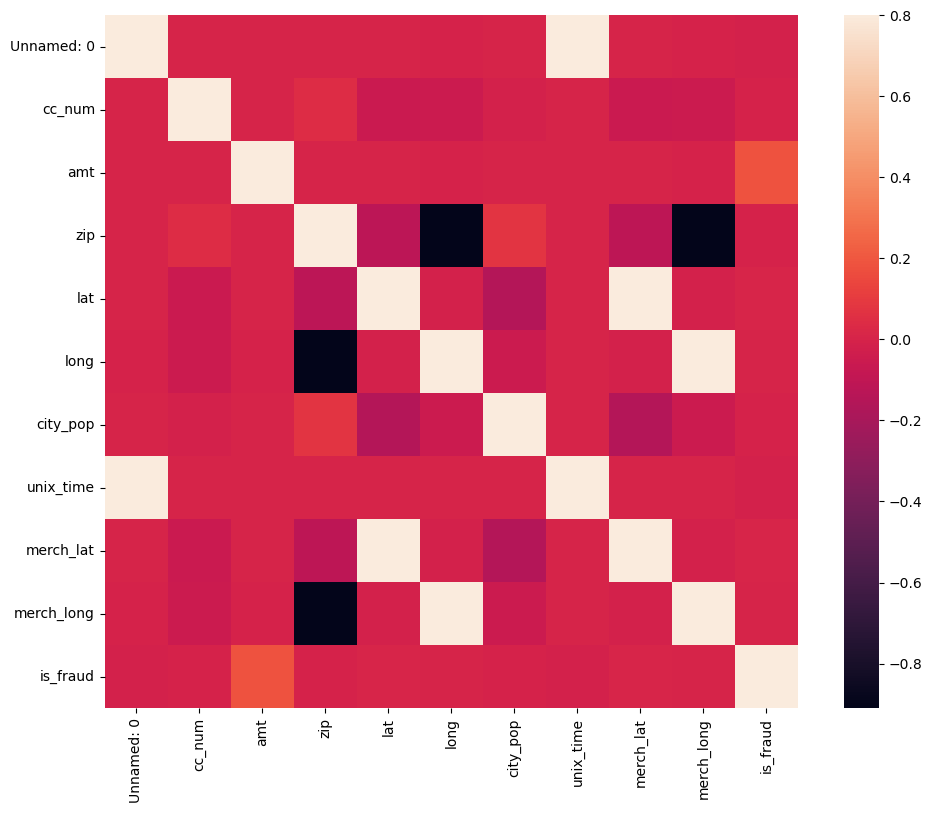

In [32]:
# Correlation matrix
corrmat = CreditData.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [36]:
X= CreditData.drop(columns='is_fraud',axis=1)

In [37]:
Y= CreditData['is_fraud']

In [38]:
print(X)

        Unnamed: 0            cc_num     amt    zip      lat      long  \
0                0  2291163933867244    2.86  29209  33.9659  -80.9355   
1                1  3573030041201292   29.84  84002  40.3207 -110.4360   
2                2  3598215285024754   41.28  11710  40.6729  -73.5365   
3                3  3591919803438423   60.05  32780  28.5697  -80.8191   
4                4  3526826139003047    3.19  49632  44.2529  -85.0170   
...            ...               ...     ...    ...      ...       ...   
555714      555714    30560609640617   43.77  63453  40.4931  -91.8912   
555715      555715  3556613125071656  111.84  77566  29.0393  -95.4401   
555716      555716  6011724471098086   86.88  99323  46.1966 -118.9017   
555717      555717     4079773899158    7.99  83643  44.6255 -116.4493   
555718      555718  4170689372027579   38.13  73034  35.6665  -97.4798   

        city_pop   unix_time  merch_lat  merch_long  
0         333497  1371816865  33.986391  -81.200714  
1  

In [39]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64


In [40]:
###Splitting the data into training and testing data

In [41]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify=Y)

In [42]:
print(X.shape, X_Train.shape, X_Test.shape)

(555719, 10) (444575, 10) (111144, 10)


In [43]:
###Model Training 

In [44]:
###Using Logistic Regression

In [45]:
model= LogisticRegression()

In [46]:
model.fit(X_Train, Y_Train)

C:\Users\anshi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
#Accuracy on Training Data
X_Train_Prediction= model.predict(X_Train)

In [48]:
Training_Data_Accuracy=accuracy_score(X_Train_Prediction, Y_Train)

In [49]:
print("Accuracy of the model is: ", Training_Data_Accuracy)

Accuracy of the model is:  0.9961401338356858


In [50]:
# Accuracy on Test Data
X_Test_Prediction= model.predict(X_Test)

In [51]:
Test_Data_Accuracy= accuracy_score(X_Test_Prediction,Y_Test)

In [52]:
print("Accuracy of the Test Data is: ", Test_Data_Accuracy)

Accuracy of the Test Data is:  0.9961401425178147


In [53]:
### Building a Random Forest Model using scikit learn

In [54]:
rfc = RandomForestClassifier()
rfc.fit(X_Train, Y_Train)
yPred = rfc.predict(X_Test)

In [57]:
acc = accuracy_score(Y_Test, yPred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(Y_Test, yPred)
print("The precision is {}".format(prec))

The accuracy is 0.9975887137407328
The precision is 0.8577777777777778
